In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("data\\finance_data.csv")

df.head()

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2024,"245,122","88,136","512,163","243,686","118,548"
1,Microsoft,2023,"211,915","72,361","411,976","205,753","87,582"
2,Microsoft,2022,"198,270","72,738","364,840","198,298","83,383"
3,Tesla,2024,"97,690","7,153","122,070","48,390","14,923"
4,Tesla,2023,"96,773","14,974","106,618","43,009","13,256"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Company                              9 non-null      object
 1   Fiscal Year                          9 non-null      int64 
 2   Total Revenue                        9 non-null      object
 3   Net Income                           9 non-null      object
 4   Total Assets                         9 non-null      object
 5   Total Liabilities                    9 non-null      object
 6   Cash Flow from Operating Activities  9 non-null      object
dtypes: int64(1), object(6)
memory usage: 636.0+ bytes


In [5]:
# List of columns to convert
cols_to_convert = [
    'Total Revenue',
    'Net Income',
    'Total Assets',
    'Total Liabilities',
    'Cash Flow from Operating Activities'
]

# Remove commas and convert to numeric
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace(',', '').str.replace('$', ''), errors='coerce')


In [6]:
# Sort data by Company and Year
df = df.sort_values(by=['Company', 'Fiscal Year'])

# Revenue Growth (%)
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100

# Net Income Growth (%)
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100

# Cash Flow Growth (%)
df['CFO Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

df


,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),CFO Growth (%)
8,Apple,2022,394328,99803,352755,302083,122151,NaN,NaN,NaN
7,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-9.502992
6,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,6.975566
2,Microsoft,2022,198270,72738,364840,198298,83383,NaN,NaN,NaN
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,5.035799
0,Microsoft,2024,245122,88136,512163,243686,118548,15.669962,21.800417,35.356580
5,Tesla,2022,81462,12587,82338,36440,14724,NaN,NaN,NaN
4,Tesla,2023,96773,14974,106618,43009,13256,18.795267,18.964010,-9.970117
3,Tesla,2024,97690,7153,122070,48390,14923,0.947578,-52.230533,12.575438


In [7]:
# Average revenue growth by company
avg_growth = df.groupby('Company')['Revenue Growth (%)'].mean()
print("Average Revenue Growth (%) by Company:\n", avg_growth)

# Max net income year per company
max_income = df.groupby('Company')['Net Income'].idxmax()
print("\nYear with Highest Net Income per Company:\n", df.loc[max_income, ['Company', 'Fiscal Year','Net Income']])


Average Revenue Growth (%) by Company:
 Company
Apple        -0.389233
Microsoft    11.275996
Tesla         9.871422
Name: Revenue Growth (%), dtype: float64

Year with Highest Net Income per Company:
      Company  Fiscal Year  Net Income
8      Apple         2022       99803
0  Microsoft         2024       88136
4      Tesla         2023       14974


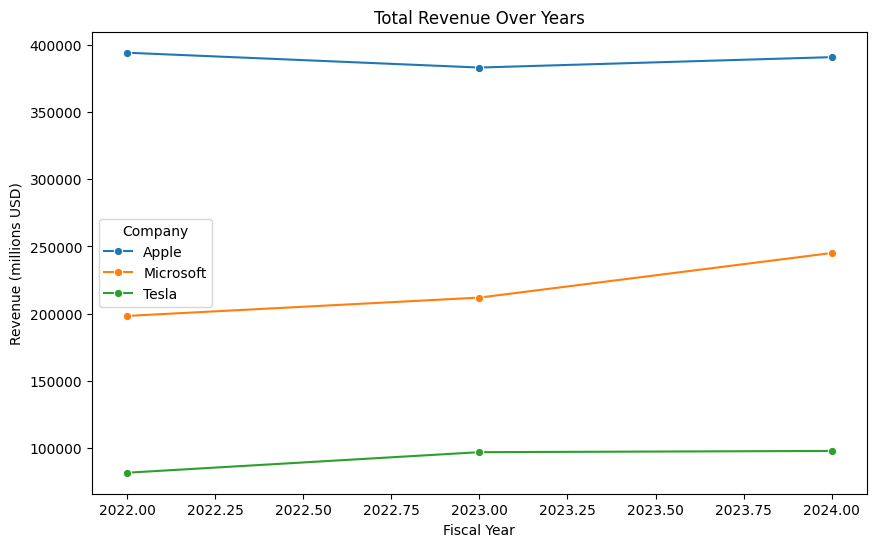

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Fiscal Year', y='Total Revenue', hue='Company', marker='o')
plt.title('Total Revenue Over Years')
plt.ylabel('Revenue (millions USD)')
plt.show()


### **Financial Analysis Summary**

#### **Revenue Trends**

* **Microsoft:** Exhibits strong and consistent revenue growth over the three-year period, averaging **11.28% per year**. Revenue increased from \$198,270M in 2022 to \$245,122M in 2024.
* **Apple:** Revenue shows minor fluctuations, with a slight decline in 2023 (-2.8%) followed by a recovery in 2024 (+2.02%), averaging **-0.39% per year** over the period.
* **Tesla:** Revenue grew consistently with strong growth in 2023 (18.8%) and a modest increase in 2024 (0.95%), averaging **9.87% per year**.

#### **Net Income Trends**

* **Microsoft:** Net income increased sharply in 2024 (+21.8%), achieving the **highest net income in the period** (\$88,136M).
* **Apple:** Net income declined steadily over the period, from \$99,803M in 2022 to \$93,736M in 2024, peaking in **2022**.
* **Tesla:** Net income showed high volatility: highest in 2023 (\$14,974M), but dropped significantly in 2024 (-52.23%), reflecting operational and margin challenges.

#### **Cash Flow from Operating Activities (CFO)**

* **Microsoft:** CFO grew strongly in 2024 (+35.36%), reflecting efficient operational cash conversion.
* **Apple:** CFO recovered in 2024 (+6.97%) after a decline in 2023, signaling improved operational efficiency.
* **Tesla:** CFO decreased in 2023 (-9.97%) but rebounded in 2024 (+12.57%), showing adjustments in cash management.

#### **Key Insights**

* **Microsoft** is the most stable company with consistent revenue, net income, and strong cash generation.
* **Apple** maintains high revenue but faces margin pressures and slightly declining net income.
* **Tesla** has strong growth potential but experiences significant volatility in profitability, indicating operational risk.

#### **Summary Table of Highlights**

| Company   | Average Revenue Growth (%) | Year with Highest Net Income | Net Income (M) |
| --------- | -------------------------- | ---------------------------- | -------------- |
| Microsoft | 11.28                      | 2024                         | 88,136         |
| Apple     | -0.39                      | 2022                         | 99,803         |
| Tesla     | 9.87                       | 2023                         | 14,974         |

